In [34]:
import shapefile
import fiona
from shapely.geometry import Point, shape
import pandas as pd
import matplotlib.pyplot as plt

polygons = [pol for pol in fiona.open('sandbanks_estuaries_habitats.shp')]

site_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/PublicNatura2000End2017_csv/NATURA2000SITES.csv")
hab_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/PublicNatura2000End2017_csv/HABITATS.csv")

habitat_type = '1110'
sandbank_cover_df = pd.DataFrame(columns=['MPA_Code', 'Area', 'Cover', 'Cover/Area'])

for i, poly in enumerate(polygons):
	sitecode = poly['properties']['SITECODE']
	areaseries = site_data.loc[site_data.SITECODE==sitecode]['AREAHA'].values
	area = areaseries[0]/100
	coverseries = hab_data.loc[(hab_data.SITECODE==sitecode) & (hab_data.HABITATCODE==habitat_type)]['COVER_HA'].values
	cover = coverseries[0]/100
	if((cover>0) & (cover<=area)):
		sandbank_cover_df.loc[i] = (sitecode, area, cover, cover/area)

	if i%100 == 0:
		print(i)

0
100
200
300
400
500
600
700


In [60]:
from scipy import stats
import numpy as np

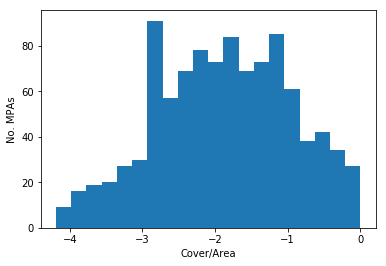

In [62]:
x = reef_cover_df['Cover/Area']
xt,_ = stats.boxcox(x)
plt.hist(xt, bins=20)
plt.ylabel('No. MPAs')
plt.xlabel('Cover/Area')
#plt.axis([0,1,0,600])
plt.show()

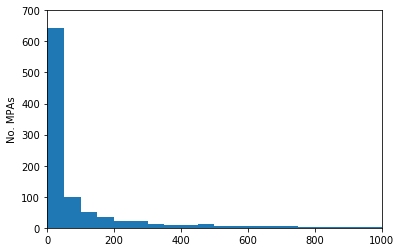

In [46]:
plt.hist(reef_cover_df['Area'], range=(0,1000), bins=20)
plt.ylabel('No. MPAs')
plt.axis([0,1000,0,700])
plt.show()

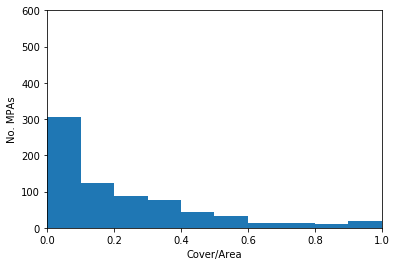

In [48]:
plt.hist(sandbank_cover_df['Cover/Area'], range=(0,1), bins=10)
plt.ylabel('No. MPAs')
plt.xlabel('Cover/Area')
plt.axis([0,1,0,600])
plt.show()

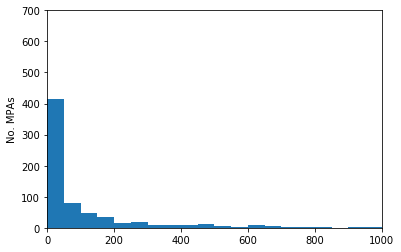

In [51]:
plt.hist(sandbank_cover_df['Area'], range=(0,1000), bins=20)
plt.ylabel('No. MPAs')
plt.axis([0,1000,0,700])
plt.show()

In [72]:
reef_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/reef_MPAs_per_km2_temp.csv")

print(reef_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area        Cover  fishing_hours  \
4            0  BEMNZ0001  1099.3990   506.000000     976.614583   
2           62  FR5302008   457.2800   173.766400     508.259028   
21           2  BG0001001   980.9976   613.604500     195.828194   
6           58  FR5300031   283.3697   153.257400     220.560278   
24          64  FR5400469  4560.2700   586.450700     849.231806   
15          36  ESZZ12003  3389.6103   315.146000    1079.190000   
26           3  BG0001501   553.4528   553.452800      92.518333   
7           57  FR5300023   586.3676   127.470000     371.019722   
36         127  UK0030385   965.7500   820.320000      90.661667   
13          80  IE0002330   716.2970   208.570000     243.897917   
8           97  LTNER0006   250.4100    98.040000     132.651806   
41          38  ESZZ16002  3353.5360   439.982500     279.636806   
10          45  FR2500079   828.3600    41.471500     393.803333   
22         121  UK0030373   340.8958   102.26870

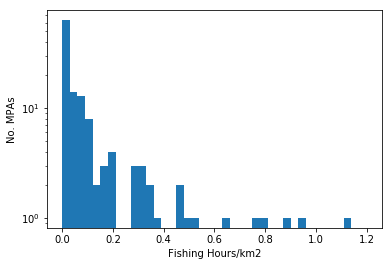

In [92]:
x = reef_data['fishing_hours_per_km2']
plt.hist(x, range=(0,1.2), bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Fishing Hours/km2')
plt.show()

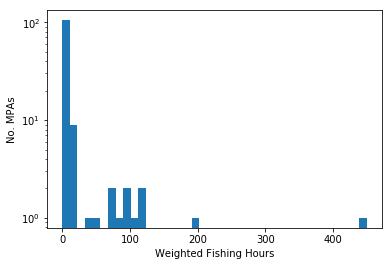

In [84]:
x = reef_data.loc[reef_data.fishing_hours_coverage>0]['fishing_hours_coverage']
#xt,_ = stats.boxcox(x)
xt = np.log(x)
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
#plt.axis([0,1,0,600])
plt.show()

In [125]:
sandbank_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/sandbanks_MPAs_per_km2.csv")

print(sandbank_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area      Cover  fishing_hours  \
5          101  NL1000001  2648.5800  1425.6800    5143.693889   
6            0  BEMNZ0001  1099.3990  1099.3990    2064.249028   
0           56  FR3102004   682.4500   586.9070    2313.366389   
3           54  FR3102002  1129.1900   793.2000    2827.098333   
11         105  NL9802001  1444.7500  1444.7400    1896.412778   
20         104  NL4000017   835.3400   812.6000     450.524861   
15          49  FR2500079   828.3600   588.8953     595.585833   
4          103  NL2008003   175.2100   175.2100     412.871111   
24          75  FR5400469  4560.2700   755.6367    2222.051528   
8           22  DK00FX112  2690.7900   240.0000    4024.772083   
19          18  DK00AY176  1347.6000   400.0000     750.804028   
1          136  UK0030368    67.0900    67.0900     206.878611   
9           78  FR7200812   507.1600   147.6850     694.237639   
10          74  FR5302008   457.2800   137.1840     601.357639   
13        

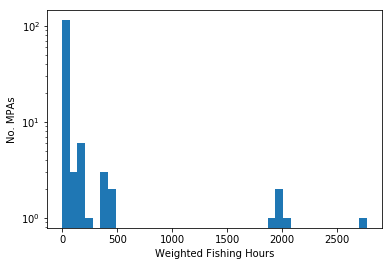

In [89]:
x = sandbank_data.loc[sandbank_data.fishing_hours_coverage>0]['fishing_hours_coverage']
#xt,_ = stats.boxcox(x)
#xt = np.log(x)
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
#plt.axis([0,1,0,600])
plt.show()

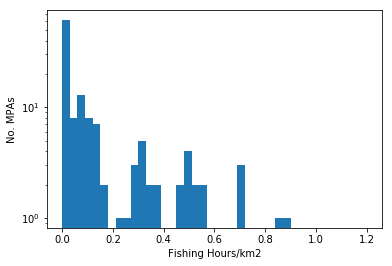

In [93]:
x = sandbank_data['fishing_hours_per_km2']
plt.hist(x, range=(0,1.2), bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Fishing Hours/km2')
plt.show()

In [94]:
estuary_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/estuaries_MPAs_per_km2.csv")

print(estuary_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area       Cover  fishing_hours  \
0           21  NL1000001  2648.5800  153.260000    5143.693889   
7            1  DE0916391  4521.0100  156.750996    1384.635833   
4           15  FR5400469  4560.2700   45.602700    2222.051528   
6           27  UK0017072   652.2612   65.226100     206.909444   
5            3  DE2306301  2769.5622   24.000000    1008.913056   
15          26  UK0013690   461.0995  188.728000      19.534583   
11          28  UK0019808  1512.7399   30.254800     196.287778   
12          14  FR5300015   266.1700   10.659000      26.756528   
21          25  UK0013117  1460.1052   45.263300      19.821528   
13          12  FR5300010   912.2800    5.880000      83.455000   
23          22  NL9803061   440.5200  283.380000       0.765278   
8           13  FR5300011   557.9639    1.676100     161.544167   
22          10  FR5202011   307.1400   52.213800       2.266944   
1            8  FR2500079   828.3600    0.414700     595.58583

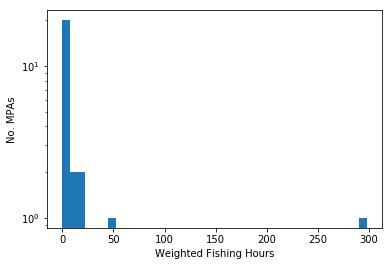

In [96]:
x = estuary_data.loc[estuary_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [99]:
posidonia_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/posidonia_MPAs_per_km2.csv")

print(posidonia_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area       Cover  fishing_hours  \
11          24  ITB030080   268.9900  134.485000      17.316111   
9           21  ITA010024   542.8100   77.487600      39.292500   
13          15  IT5160018    87.2700   78.543000       4.966528   
2           17  IT6000011    21.3000   10.803700       3.324861   
8            2  ESZZ16002  3353.5360   18.543000     279.636806   
16          10  GR2230004  1355.2790   34.620000      58.426944   
15          19  IT6000013    38.4700   24.489300       2.056944   
17           9  FR9402015   946.1200   47.306000      25.043611   
6            7  FR9301999   188.8700   10.490000      22.040417   
4           18  IT6000012    25.5300    9.583700       3.041389   
7            3  ESZZ16003  2829.2454   11.068600     245.574583   
5           23  ITA090028    53.6700    6.734000       6.274167   
0            5  FR9102014    88.9600    0.897000      57.248889   
14          22  ITA040014    40.8500    5.270700       2.32375

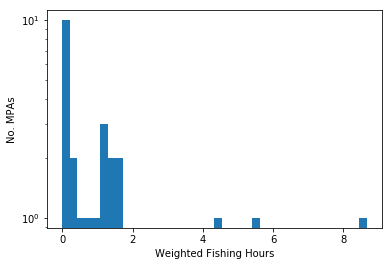

In [100]:
x = posidonia_data.loc[posidonia_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [101]:
mudflat_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/mudflats_MPAs_per_km2.csv")

print(mudflat_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area       Cover  fishing_hours  \
0           38  NL1000001  2648.5800  1291.69000    5143.693889   
12           6  DE2306301  2769.5622  1495.00000    1008.913056   
14           2  DE0916391  4521.0100  1534.28500    1384.635833   
8            7  DK00AY176  1347.6000   450.00000     750.804028   
3           40  NL9802001  1444.7500    30.53000    1896.412778   
13          53  UK0017072   652.2612    58.31220     206.909444   
11          29  FR5400469  4560.2700    30.09780    2222.051528   
9           39  NL4000017   835.3400    22.24000     450.524861   
30          51  UK0013690   461.0995   235.89850      19.534583   
1           32  FR7200812   507.1600     7.20170     694.237639   
22          20  FR5300010   912.2800    64.47000      83.455000   
19          56  UK0030371   648.7685    32.11400      90.482222   
17          13  ES0000020   485.3197    16.08116     131.346806   
15          21  FR5300011   557.9639    11.17400     161.54416

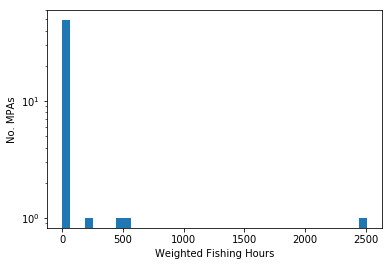

In [102]:
x = mudflat_data.loc[mudflat_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [103]:
lagoon_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/lagoons_MPAs_per_km2.csv")

print(lagoon_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area       Cover  fishing_hours  \
12          26  FR9301592  1134.6600  206.300000      31.682917   
5           14  ES0000020   485.3197   14.966648     131.346806   
4            1  BG0001001   980.9976    5.430063     283.837639   
1            7  DK00AY176  1347.6000    2.030000     750.804028   
15           4  DE1747301   604.0600   16.442600      10.480139   
13          29  SE0430095   423.4220    2.429000      11.133194   
3            2  DE0916391  4521.0100    0.149000    1384.635833   
0           24  FR5300023   586.3676    0.045200     518.762639   
2            6  DE2306301  2769.5622    0.050000    1008.913056   
24          18  FI0200090   497.3500    5.000000       1.735972   
26          16  FI0100005   526.3000    5.000000       1.325139   
14          27  GR2530007  2365.7115    0.540000      53.076250   
16          30  UK0013117  1460.1052    0.730100      19.821528   
7           21  FR5300010   912.2800    0.106400      83.45500

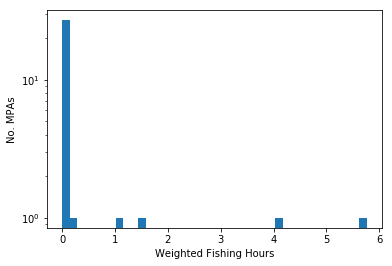

In [104]:
x = lagoon_data.loc[lagoon_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [113]:
shallow_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/shallow_MPAs_per_km2.csv")

print(shallow_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area        Cover  fishing_hours  \
7            2  DE0916391  4521.0100  2912.700000     536.489583   
4            6  DE2306301  2769.5622  1026.000000     834.691389   
6           22  FR5400469  4560.2700   605.603900     849.231806   
3            4  DE1714391   174.5000   164.455000      64.653889   
12          37  UK0019808  1512.7399   671.656500     106.809028   
1           18  FR5300023   586.3676    46.112000     371.019722   
0           21  FR5302008   457.2800    13.718400     508.259028   
10          13  FR2502021   444.0200    29.785500      45.006389   
15          27  GR1110004   163.2912    50.481042       7.563889   
36          28  GR1430004  2491.5098  2321.769589       1.894444   
16          30  IE0000764   169.3271    52.438404       5.048056   
24           3  DE1631392   618.3000   136.342002       4.955972   
19          15  FR5300010   912.2800    38.780000      24.474306   
14          20  FR5300049    98.5970    14.37600

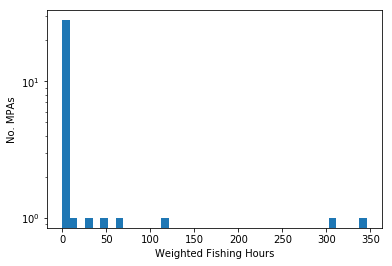

In [114]:
x = shallow_data.loc[shallow_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [115]:
gases_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/gases_MPAs_per_km2.csv")

print(gases_data.sort_values(by='fishing_hours_coverage', ascending=False).head(20))

    Unnamed: 0   MPA_Code       Area       Cover  fishing_hours  \
0            9  FR5300023   586.3676   17.617500     371.019722   
1            2  DK00VA247   260.9200   90.000000      23.901389   
8            7  ESZZ12002  3177.2377  179.996800      63.892222   
10           1  DK00FX257   185.3500   24.000000       2.656389   
2            6  ES6120032   236.4216    2.364182      20.953750   
4           10  FR5300049    98.5970    2.958900       4.588333   
3            3  DK00VA248    13.8000    1.000000       1.005278   
6            4  DK00VA249    86.1900    1.500000       3.676528   
7           13  SE0520189  1208.7840    1.000000      39.175694   
12           5  DK00VA258   108.9200    1.000000       0.651389   
9           11  IE0003015    29.8223    0.298400       0.537222   
13           8  ESZZ16010   122.6848    0.068600       0.499861   
5           12  SE0510127   132.9230    0.004000       5.714167   
11           0  DK00FX010   669.8600    0.010000       9.36402

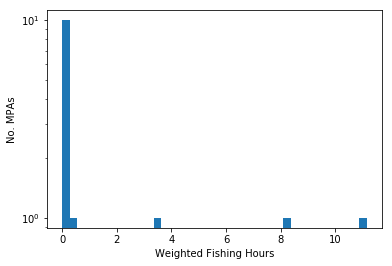

In [116]:
x = gases_data.loc[gases_data.fishing_hours_coverage>0]['fishing_hours_coverage']
plt.hist(x, bins=40, log=True)
plt.ylabel('No. MPAs')
plt.xlabel('Weighted Fishing Hours')
plt.show()

In [123]:
x=10.8988
y=11.09901
print('Proportion in MPA: %.2f%%\n' % (100*x/y))

Proportion in MPA: 98.20%



In [1]:
import shapefile
import fiona
from shapely.geometry import Point, shape
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_fishing = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/EUeez_allfishing_Mar18.csv")
sum_hours = all_fishing['fishing_hours'].sum()
print(sum_hours)

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


730290.5155555554


In [ ]:
import pandas as pd
inp = [{'c1':11, 'c2':100}, {'c1':11,'c2':110}, {'c1':12,'c2':120}]
df = pd.DataFrame(inp)
def has_a(var):
    if var==11:
        return True
    else:
        return False
print(df)
df[df.apply(lambda row: has_a(row['c1']), axis=1)]

In [81]:
import pandas as pd
gfw_data = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/all_2017_complete.csv")
gfw_data.shape

(54113486, 9)

week
1      8126.972639
2      8473.136111
3     11362.917500
4     10371.203611
5     12227.608889
6     10560.084306
7      7498.940000
8      7607.695417
9      8217.955139
10    12503.706528
11     8707.558472
12     7392.346806
13     8684.545139
14    13307.440278
15    11486.834028
16    12280.882361
17     8036.529722
18    15477.441667
19    14076.263472
20    11913.650556
Name: fishing_hours, dtype: float64


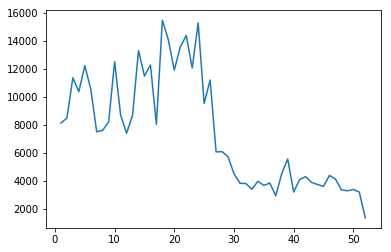

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/test_data.csv")
df.timestamp = pd.to_datetime(df.timestamp)
df['week'] = pd.DatetimeIndex(df['timestamp']).week
df_sum = df.groupby('week').fishing_hours.sum()
print(df_sum.head(20))
plt.plot(df_sum)

In [3]:
import pandas as pd
df = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/all_2017_complete.csv")
df.timestamp = pd.to_datetime(df.timestamp)
df['week'] = pd.DatetimeIndex(df['timestamp']).week
df_sum = df.groupby('week').fishing_hours.sum()
print(df_sum.head(20))
plt.plot(df_sum)


week
1     116493.447361
2     119057.979306
3     148237.496667
4     160674.625000
5     151589.488472
6     132844.883333
7     186005.612361
8     154078.629861
9     114240.163194
10    169172.375139
11    186645.585972
12    186666.084167
13    197968.119306
14    209159.125417
15    168973.709722
16    151973.921806
17    155207.388472
18    192024.018889
19    185828.214306
20    205311.386667
Name: fishing_hours, dtype: float64


NameError: name 'plt' is not defined

(0, 229377.24706948127)

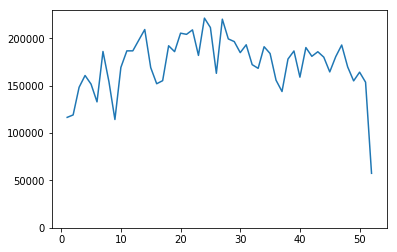

In [11]:
import matplotlib.pyplot as plt
df_sum_net = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_code/sum_weeks_2017.csv")
sum_plot = plt.plot(df_sum)
#sum_plot_net = plt.plot(df_sum_net)
plt.ylim(ymin=0)


In [ ]:
print(df_sum.head(52))
savefig('all_2017_fishing.png')

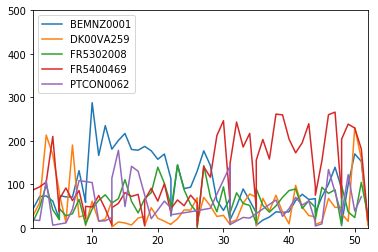

In [25]:
df1 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_BEMNZ0001.csv")
df2 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_DK00VA259.csv")
df3 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_FR5302008.csv")
df4 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_FR5400469.csv")
df5 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_PTCON0062.csv")
plt.plot(df1['week'], df1['weighted_fishing_hours'])
plt.plot(df2['week'], df2['weighted_fishing_hours'])
plt.plot(df3['week'], df3['weighted_fishing_hours'])
plt.plot(df4['week'], df4['weighted_fishing_hours'])
plt.plot(df5['week'], df5['weighted_fishing_hours'])
plt.legend(['BEMNZ0001', 'DK00VA259', 'FR5302008', 'FR5400469', 'PTCON0062'], loc='upper left')
axes = plt.gca()
axes.set_xlim([1,52])
axes.set_ylim([0,500])
plt.show()

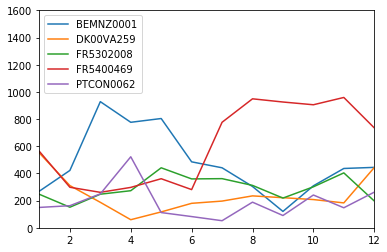

In [31]:
df1 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_BEMNZ0001.csv")
df2 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_DK00VA259.csv")
df3 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_FR5302008.csv")
df4 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_FR5400469.csv")
df5 = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_2017_PTCON0062.csv")
df1 = df1.groupby('month').weighted_fishing_hours.sum()
df2 = df2.groupby('month').weighted_fishing_hours.sum()
df3 = df3.groupby('month').weighted_fishing_hours.sum()
df4 = df4.groupby('month').weighted_fishing_hours.sum()
df5 = df5.groupby('month').weighted_fishing_hours.sum()
plt.plot(df1)
plt.plot(df2)
plt.plot(df3)
plt.plot(df4)
plt.plot(df5)
plt.legend(['BEMNZ0001', 'DK00VA259', 'FR5302008', 'FR5400469', 'PTCON0062'], loc='upper left')
axes = plt.gca()
axes.set_xlim([1,12])
axes.set_ylim([0,1600])
plt.show()

/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/mnksmith/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


189.53204269368982
7.952229717906814
721.8650570467803
0.25     0.278850
0.50     7.952230
0.75    51.666677
Name: weighted_fishing_hours, dtype: float64
47


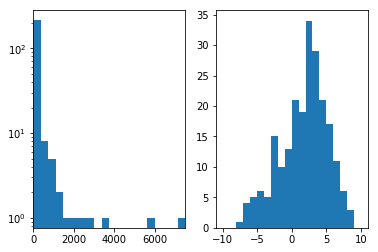

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_bympa = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_byMPA.csv")
plt.subplot(1,2,1)
wfh=df_bympa['weighted_fishing_hours']
plt.hist(wfh, range=(0,7500), bins=20, log=True)
axes = plt.gca()
axes.set_xlim([0,7500])
mean = wfh.mean()
median = wfh.median()
std_dev = wfh.std()
print(mean)
print(median)
print(std_dev)
print(wfh.quantile([0.25,0.5,0.75]))
print(df_bympa.loc[df_bympa.weighted_fishing_hours>100].MPA_name.count())
plt.subplot(1,2,2)
log_wfh=np.log(df_bympa.weighted_fishing_hours)
plt.hist(log_wfh, range=(-10,10), bins=20)
plt.show()


In [24]:
decimals = pd.Series([0, 0, 0, 2, 0], index=['area', 'cover', 'total_fishing_hours', 'fishing_density', 'weighted_fishing_hours'])
df_bympa.sort_values(by='fishing_density', ascending=False).round(decimals).head(10)

,MPA_code,MPA_name,MPA_type,area,cover,total_fishing_hours,fishing_density,weighted_fishing_hours
55,IT3250047,Tegnùe di Chioggia,B,27.0,1.0,1360.0,51.23,71.0
99,HR3000100,Otok Jabuka - podmorje,B,1.0,0.0,46.0,40.47,14.0
35,FR3102004,Ridens et dunes hydrauliques du détroit du Pas...,B,682.0,7.0,16106.0,23.60,161.0
52,DK00VA250,Store Middelgrund,B,21.0,4.0,499.0,23.35,82.0
2,FR5302008,Roches de Penmarch,B,457.0,174.0,9249.0,20.23,3515.0
5,FR5300031,Ile de Groix,B,283.0,153.0,3925.0,13.85,2123.0
0,FR5400469,Pertuis Charentais,B,4560.0,586.0,56854.0,12.47,7311.0
110,FR2502021,Baie de Seine orientale,B,444.0,1.0,5414.0,12.19,11.0
15,DK00VA258,Store Rev,B,109.0,55.0,1301.0,11.95,657.0
3,DK00VA259,Gule Rev,B,471.0,250.0,5443.0,11.57,2891.0


2.1155292401417993
0.3017474291982637
5.358436864447957
0.25    0.053728
0.50    0.301747
0.75    1.683569
Name: fishing_density, dtype: float64
MPA_code                  83
MPA_name                  83
MPA_type                  83
area                      83
cover                     82
total_fishing_hours       83
fishing_density           83
weighted_fishing_hours    82
dtype: int64


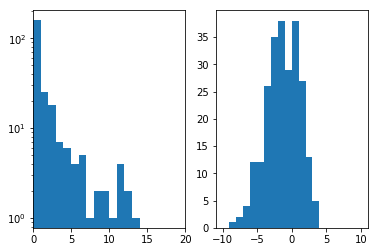

In [66]:
import numpy as np
df_bympa = pd.read_csv("/Users/mnksmith/Documents/Oceana_MPA_data/reef_byMPA.csv")
plt.subplot(1,2,1)
fd=df_bympa['fishing_density']
plt.hist(fd, range=(0,20), bins=20, log=True)
axes = plt.gca()
axes.set_xlim([0,20])
mean = fd.mean()
median = fd.median()
std_dev = fd.std()
print(mean)
print(median)
print(std_dev)
print(fd.quantile([0.25,0.5,0.75]))
print(df_bympa.loc[df_bympa.fishing_density>1].count())
plt.subplot(1,2,2)
log_fd=np.log(fd)
plt.hist(log_fd, range=(-10,10), bins=20)
plt.show()